## Dataset

In [ ]:
import tensorflow as tf
import os

data_zip = tf.keras.utils.get_file('dataset.zip',
                                        extract=True,
                                        cache_subdir=os.path.abspath('.'),
                                        # origin="https://people.eecs.berkeley.edu/~taesung_park/CycleGAN/datasets/apple2orange.zip")
                                        # origin='https://people.eecs.berkeley.edu/~taesung_park/CycleGAN/datasets/horse2zebra.zip')
                                        origin='https://people.eecs.berkeley.edu/~taesung_park/CycleGAN/datasets/vangogh2photo.zip')


In [ ]:
os.mkdir('./output')
os.mkdir('./models')

## Build model

In [5]:
from model import CycleGAN

gan = CycleGAN(mode='train', base='resnet', verbose=False)
gan.build()
gan.compile(learning_rate=2e-4, cycle_loss_weight=10, identity_loss_weight=1, 
            disc_loss_weight=1, disc_2_loss_weight=0)

## Training

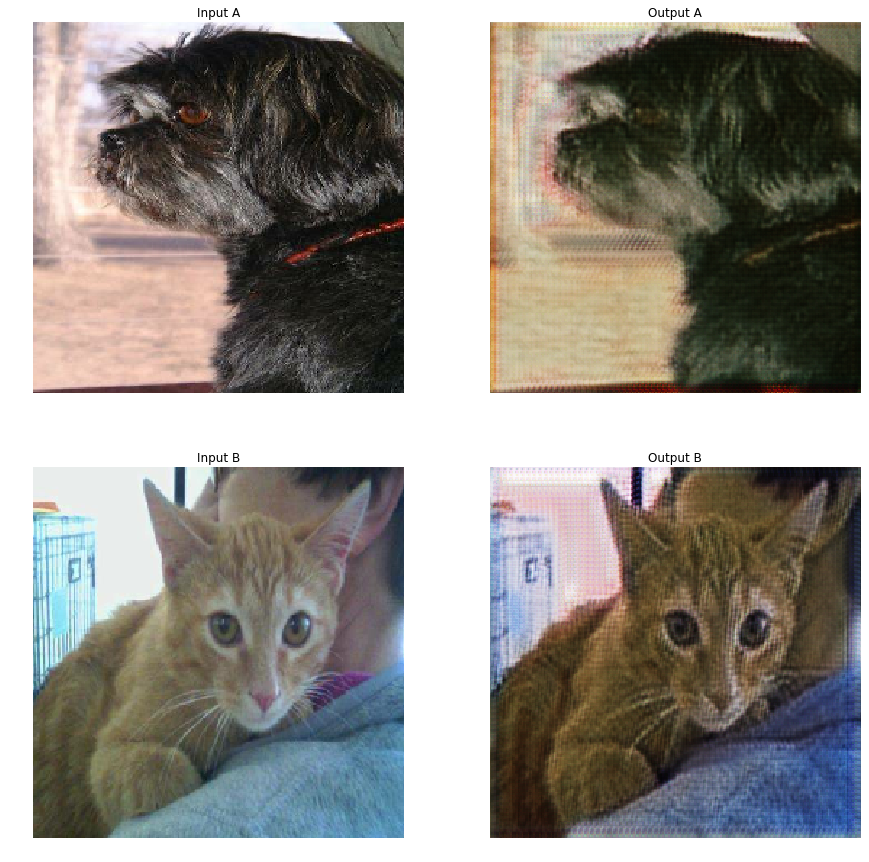

[Epoch 6/200] [Batch 1/1000] [D_A loss: 0.259217] [D_B loss: 0.176699] [D_A_2 loss: 0.000288] [D_B_2 loss: 0.000292] [G loss: 4.406313] time: 0.9306643009185791
[Epoch 6/200] [Batch 2/1000] [D_A loss: 0.168371] [D_B loss: 0.192902] [D_A_2 loss: 0.019144] [D_B_2 loss: 0.000287] [G loss: 3.978554] time: 0.3669896125793457
[Epoch 6/200] [Batch 3/1000] [D_A loss: 0.216350] [D_B loss: 0.107313] [D_A_2 loss: 0.000625] [D_B_2 loss: 0.000016] [G loss: 4.404990] time: 0.3725314140319824
[Epoch 6/200] [Batch 4/1000] [D_A loss: 0.264002] [D_B loss: 0.362116] [D_A_2 loss: 0.000664] [D_B_2 loss: 0.000083] [G loss: 3.672351] time: 0.35202479362487793
[Epoch 6/200] [Batch 5/1000] [D_A loss: 0.144078] [D_B loss: 0.328984] [D_A_2 loss: 0.000385] [D_B_2 loss: 0.000798] [G loss: 3.834709] time: 0.3664896488189697
[Epoch 6/200] [Batch 6/1000] [D_A loss: 0.221757] [D_B loss: 0.160025] [D_A_2 loss: 0.003189] [D_B_2 loss: 0.000135] [G loss: 4.267218] time: 0.38903331756591797
[Epoch 6/200] [Batch 7/1000] [D_

In [ ]:
gan.train('../dataset/cat2dog/training_set/dogs/*.jpg', '../dataset/cat2dog/training_set/cats/*.jpg', epochs=200, decay_from=100, 
          steps_per_epoch=1000, true_label_value=1, batch_size=1, image_save_path='../output/20190318/', model_save_path='../models/20190318/',
          save_image_every_step=100, save_model_every_epoch=1,
          show_image=True, load_model=False, model_load_path='../models/20190318/')

## Test

In [ ]:
gan.test('../dataset/horse2zebra/testA/*.jpg', '../models/20190313/model-gan.h5', is_a2b=True,
         batch_size=1, image_save_path='../output/horse2zebra/testA/', show_image=True, show_image_every_step=50)

In [ ]:
gan.test('../dataset/horse2zebra/testB/*.jpg', '../models/20190313/model-gan.h5', is_a2b=False,
         batch_size=1, image_save_path='../output/horse2zebra/testB/', show_image=True, show_image_every_step=50)

## Save model to Google cloud

In [ ]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once in a notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Create & upload a file.
uploaded = drive.CreateFile({'title': 'model-disc-a.h5'})
uploaded.SetContentFile('./models/model-disc-a.h5')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

uploaded = drive.CreateFile({'title': 'model-disc-b.h5'})
uploaded.SetContentFile('./models/model-disc-b.h5')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

uploaded = drive.CreateFile({'title': 'model-gan.h5'})
uploaded.SetContentFile('./models/model-gan.h5')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

## Get model from Google cloud

In [ ]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once per notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
# os.makedirs('./logo_checkpoints/')
file_id = '1-GwlVFw_pYxEq_v61k-OngKvQu6iRMY3'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('./models/model-disc-a.h5')
file_id = '1lkUiUNrLW9BofTAVb70iSfjNH4KYkfWM'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('./models/model-disc-b.h5')
file_id = '1GXXUxSmfYJVZ047hqU52HQt8lXDW5iC3'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('./models/model-gan.h5')
# print('Downloaded content "{}"'.format(downloaded.GetContentString()))